Datasetin notebook içerisine import edilmesi

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices/HousingPrices.csv
/kaggle/input/housing-prices/data_description.txt


# Gerekli kütüphanelerin eklenmesi

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Veri setini dataframe formatına çevirip id sütununu çıkarıyoruz.

In [3]:
# Veri setini yükle
data = pd.read_csv("/kaggle/input/housing-prices/HousingPrices.csv")
data = data.drop(columns=['Id'])

In [4]:
data.shape

(2919, 80)

Başta 79 özellik ve bir hedef değişken vardır.<br>
Hedef değişken: **SalePrice**(Ev Fiyatı)

In [5]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


**Hedef değişken ve geri kalan özellikleri ayırıp boyut kontrolü yapıldı**

In [7]:
# Separate into X and y
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Print the new shapes
print(f"New shape of X: {X.shape}")
print(f"New shape of y: {y.shape}")

New shape of X: (2919, 79)
New shape of y: (2919,)


**Hedef değişkendeki toplam eksik değer bulundu**

In [8]:
# Step 1: Check Missing Values in Target Variable (y)
missing_y_count = y.isnull().sum()
print(f"Number of NaN values in target variable (y): {missing_y_count}")

Number of NaN values in target variable (y): 1459


**Tüm veriden hedef değişkene göre eksik verileri çıkarmak için veri birleştirildi ve toplu şekilde çıkarıldı.**<br>
**Bu işlemden sonra veri boyutu (1460,80) olmuştur ve veri tekrar parçalanmıştır.**

In [9]:
# Step 1: Drop Columns with More Than 20% NaN
threshold = 0.2
nan_percentages = X.isna().mean()
cols_to_drop = nan_percentages[nan_percentages > threshold].index
X = X.drop(columns=cols_to_drop)

# Step 2: Drop Rows with NaN in y
data_combined = pd.concat([X, y], axis=1)  # Combine X and y
data_combined = data_combined.dropna(subset=['SalePrice'])

# Separate back into X and y
X = data_combined.drop(columns=['SalePrice'])
y = data_combined['SalePrice']

print(f"Shape of X after dropping NaN in y: {X.shape}")
print(f"Shape of y after dropping NaN in y: {y.shape}")

Shape of X after dropping NaN in y: (1460, 73)
Shape of y after dropping NaN in y: (1460,)


**Artık sadece özellikler içerisinde eksik veri kalmıştır. Bu veriler impute edilmiştir. Numeric değerler içlerindeki medyan ile kategorik değerler ise en çok olan değer ile impute edilmiştir. Son olarak hiç eksik veri kalıp kalmadığı kontrol edilmiştir.**

In [10]:
# Step 3: Impute Missing Values in X
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Final Check for Missing Values
print(f"Remaining missing values in X: {X.isnull().sum().sum()}")
print(f"Remaining missing values in y: {y.isnull().sum()}")

Remaining missing values in X: 0
Remaining missing values in y: 0


In [11]:
print(f"Shape of X after dropping NaN in y: {X.shape}")
print(f"Shape of y after dropping NaN in y: {y.shape}")

Shape of X after dropping NaN in y: (1460, 73)
Shape of y after dropping NaN in y: (1460,)


**Label encoding ile kategorik veriler encode edilmiştir.**

In [12]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluştur
label_encoders = {}

# Her kategorik sütun için Label Encoding uygula
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [13]:
X.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4
5,50.0,3,85.0,14115.0,1,0,3,0,4,0,...,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,8,4
6,20.0,3,75.0,10084.0,1,3,3,0,4,0,...,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4
7,60.0,3,69.0,10382.0,1,0,3,0,0,0,...,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,8,4
8,50.0,4,51.0,6120.0,1,3,3,0,4,0,...,0.0,205.0,0.0,0.0,0.0,0.0,4.0,2008.0,8,0
9,190.0,3,50.0,7420.0,1,3,3,0,0,0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,8,4


**Aynı veri tipinde benzer anlamdaki veriler birleştirilmiştir. Domain_specific Feature Engineering.**

In [14]:
# Step 5: Domain-Specific Feature Engineering
X['TotalArea'] = X['GrLivArea'] + X['TotalBsmtSF'] + X['GarageArea']
X['AgeOfHouse'] = X['YrSold'] - X['YearBuilt']

# Drop redundant columns
X = X.drop(columns=['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'YrSold'])

**MinMaxScale metodu ile özelliklerin değerleri 0-1 aralığına normalize edilmiştir.**

In [15]:
# Step 6: Normalize Numerical Features
scaler = MinMaxScaler()
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [16]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,TotalArea,AgeOfHouse
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.090909,1.0,0.8,0.216578,0.036765
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.363636,1.0,0.8,0.206451,0.227941
2,0.235294,0.75,0.160959,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.727273,1.0,0.8,0.232160,0.051471
3,0.294118,0.75,0.133562,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,...,0.492754,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.216656,0.669118
4,0.235294,0.75,0.215753,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.000000,1.0,0.8,0.299548,0.058824


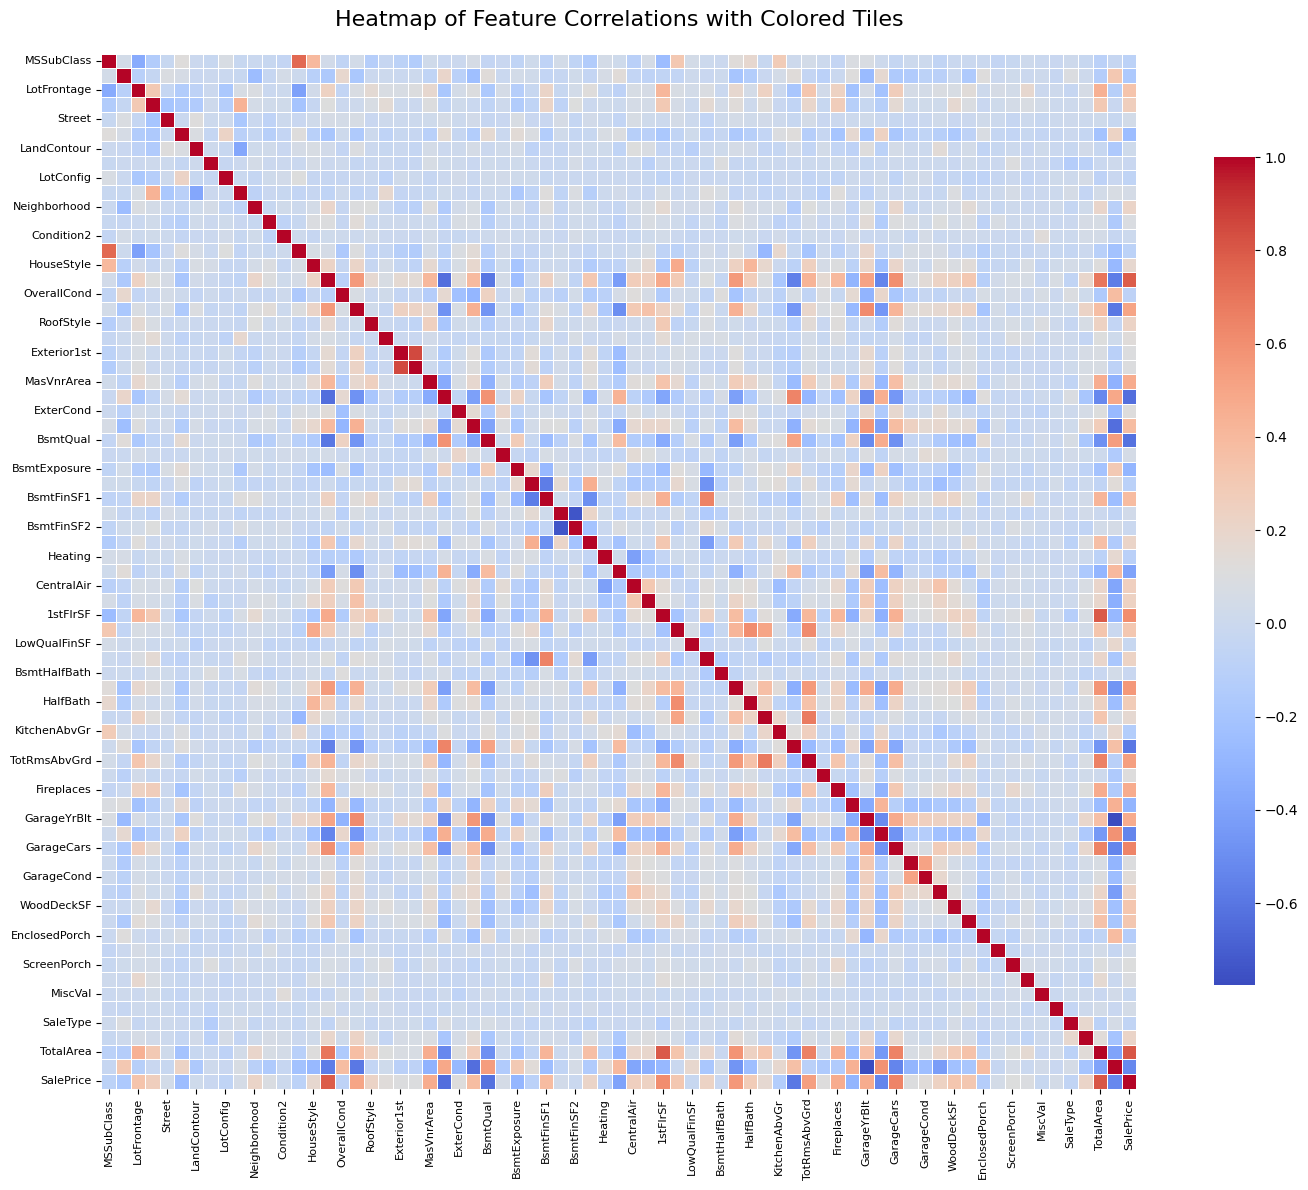

In [17]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Plot heatmap as colorful tiles
plt.figure(figsize=(16, 12))  # Genişliği ve yüksekliği artır
sns.heatmap(
    correlation_matrix, 
    annot=False,  # Eğer yalnızca renkli karolar istiyorsanız 'annot=True' yerine bunu kullanabilirsiniz
    cmap='coolwarm', 
    fmt=".2f", 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=90, fontsize=8)  # Daha küçük yazı boyutuyla X eksenini döndür
plt.yticks(fontsize=8)  # Daha okunabilir bir yazı boyutu
plt.title('Heatmap of Feature Correlations with Colored Tiles', fontsize=16, pad=20)
plt.tight_layout()  # Etiketlerin üst üste binmesini engeller
plt.show()

**Birbiri ile çok yüksek korelasyon gösteren veriler çıkarılmıştır.**

In [18]:
# Step 7: Drop Features with Low Correlation to the Target Variable
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Identify features with low correlation to the target (SalePrice)
low_correlation_features = correlation_matrix["SalePrice"][abs(correlation_matrix["SalePrice"]) < 0.2].index

# Drop those features from X
X = X.drop(columns=low_correlation_features)

# Output the remaining features
print(f"Remaining Features: {X.columns.tolist()}")

Remaining Features: ['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'TotalArea', 'AgeOfHouse']


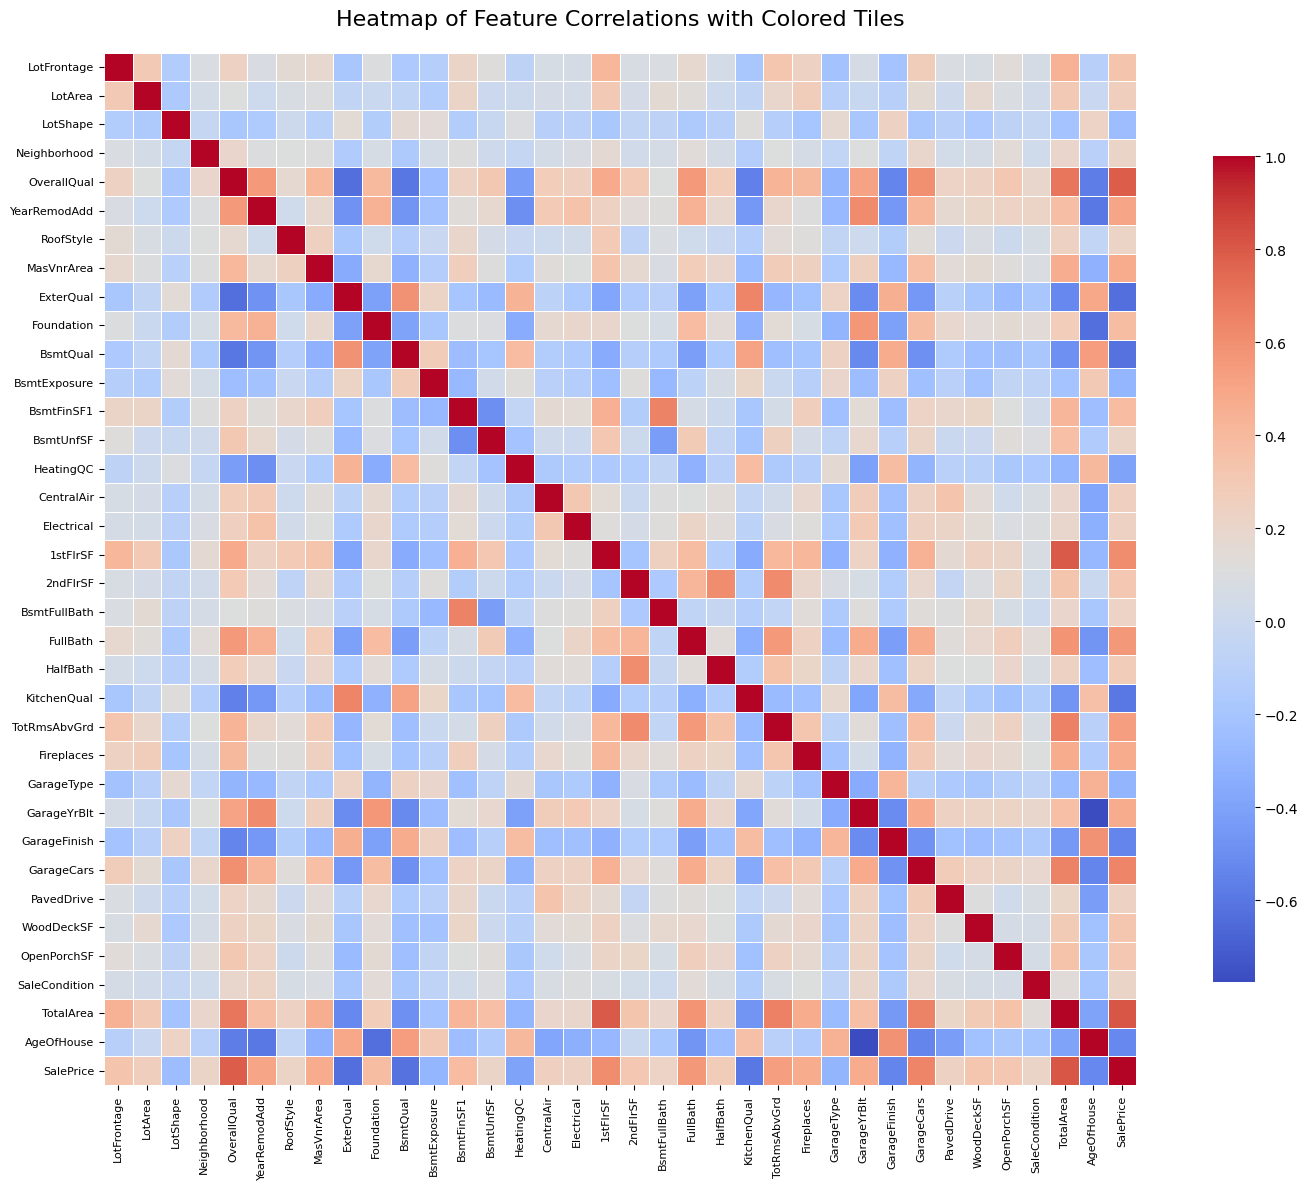

In [19]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Plot heatmap as colorful tiles
plt.figure(figsize=(16, 12))  # Genişliği ve yüksekliği artır
sns.heatmap(
    correlation_matrix, 
    annot=False,  # Eğer yalnızca renkli karolar istiyorsanız 'annot=True' yerine bunu kullanabilirsiniz
    cmap='coolwarm', 
    fmt=".2f", 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=90, fontsize=8)  # Daha küçük yazı boyutuyla X eksenini döndür
plt.yticks(fontsize=8)  # Daha okunabilir bir yazı boyutu
plt.title('Heatmap of Feature Correlations with Colored Tiles', fontsize=16, pad=20)
plt.tight_layout()  # Etiketlerin üst üste binmesini engeller
plt.show()

In [20]:
# Step 7: Drop Highly Correlated Features
correlation_matrix = X.corr()
correlated_features = set()
for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            correlated_features.add(correlation_matrix.columns[i])
X = X.drop(columns=correlated_features)

In [21]:
X.head()

,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,Foundation,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,TotalArea,AgeOfHouse
0,0.150685,0.033420,1.0,0.208333,0.666667,0.883333,0.2,0.12250,0.666667,0.4,...,0.2,0.936364,0.5,0.50,1.0,0.000000,0.111517,0.8,0.216578,0.036765
1,0.202055,0.038795,1.0,1.000000,0.555556,0.433333,0.2,0.00000,1.000000,0.2,...,0.2,0.690909,0.5,0.50,1.0,0.347725,0.000000,0.8,0.206451,0.227941
2,0.160959,0.046507,0.0,0.208333,0.666667,0.866667,0.2,0.10125,0.666667,0.4,...,0.2,0.918182,0.5,0.50,1.0,0.000000,0.076782,0.8,0.232160,0.051471
3,0.133562,0.038561,0.0,0.250000,0.666667,0.333333,0.2,0.00000,1.000000,0.0,...,1.0,0.890909,1.0,0.75,1.0,0.000000,0.063985,0.0,0.216656,0.669118
4,0.215753,0.060576,0.0,0.625000,0.777778,0.833333,0.2,0.21875,0.666667,0.4,...,0.2,0.909091,0.5,0.75,1.0,0.224037,0.153565,0.8,0.299548,0.058824


In [22]:
X.shape

(1460, 35)

In [23]:
# Check for NaN values
missing_counts = X.isna().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0])

# Count total NaN values
print(f"Total missing values: {X.isna().sum().sum()}")

Missing values per column:
Series([], dtype: int64)
Total missing values: 0


In [24]:
X.head(10)

,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,Foundation,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,TotalArea,AgeOfHouse
0,0.150685,0.033420,1.0,0.208333,0.666667,0.883333,0.2,0.12250,0.666667,0.4,...,0.2,0.936364,0.5,0.50,1.0,0.000000,0.111517,0.8,0.216578,0.036765
1,0.202055,0.038795,1.0,1.000000,0.555556,0.433333,0.2,0.00000,1.000000,0.2,...,0.2,0.690909,0.5,0.50,1.0,0.347725,0.000000,0.8,0.206451,0.227941
2,0.160959,0.046507,0.0,0.208333,0.666667,0.866667,0.2,0.10125,0.666667,0.4,...,0.2,0.918182,0.5,0.50,1.0,0.000000,0.076782,0.8,0.232160,0.051471
3,0.133562,0.038561,0.0,0.250000,0.666667,0.333333,0.2,0.00000,1.000000,0.0,...,1.0,0.890909,1.0,0.75,1.0,0.000000,0.063985,0.0,0.216656,0.669118
4,0.215753,0.060576,0.0,0.625000,0.777778,0.833333,0.2,0.21875,0.666667,0.4,...,0.2,0.909091,0.5,0.75,1.0,0.224037,0.153565,0.8,0.299548,0.058824
5,0.219178,0.059899,0.0,0.458333,0.444444,0.750000,0.2,0.00000,1.000000,1.0,...,0.2,0.845455,1.0,0.50,1.0,0.046674,0.054845,0.8,0.179495,0.117647
6,0.184932,0.041057,1.0,0.875000,0.777778,0.916667,0.2,0.11625,0.666667,0.4,...,0.2,0.945455,0.5,0.50,1.0,0.297550,0.104205,0.8,0.286849,0.022059
7,0.164384,0.042450,0.0,0.583333,0.666667,0.383333,0.2,0.15000,1.000000,0.2,...,0.2,0.663636,0.5,0.50,1.0,0.274212,0.372943,0.8,0.260751,0.264706
8,0.102740,0.022529,1.0,0.708333,0.666667,0.000000,0.2,0.00000,1.000000,0.0,...,1.0,0.281818,1.0,0.50,1.0,0.105018,0.000000,0.0,0.222811,0.566176
9,0.099315,0.028605,1.0,0.125000,0.444444,0.000000,0.2,0.00000,1.000000,0.0,...,0.2,0.354545,0.5,0.25,1.0,0.000000,0.007313,0.8,0.151060,0.507353


**SelectKBest metodu ile en iyi 30 özellik seçilmiştir. Ardından seçilen özellikler bazında standardizasyon yapılmıştır. Son olarak PCA uygulanmıştır ve her bir özelliğin açıklanabilir varyans oranına katkısı çıkarılmıştır.**

Selected Features: Index(['OverallQual', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       '1stFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'TotalArea', 'AgeOfHouse'],
      dtype='object')
Explained Variance Ratio: [0.463214   0.11941071 0.06175223 0.05700574 0.05177204 0.04160219
 0.03391292 0.03213575 0.03019426 0.02656479 0.02287212 0.02136765
 0.01894876 0.0128509  0.00639593]


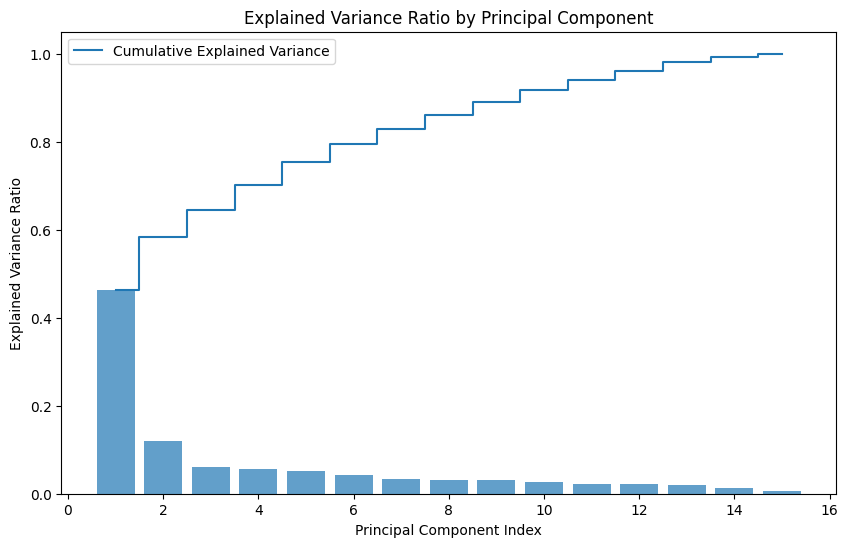

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select top 30 features using SelectKBest
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X, y)

# Get selected feature names (assuming X is a DataFrame)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Step 2: Standardize the selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Step 3: Apply PCA on the scaled selected features
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_selected_scaled)

# Optional: Inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Visualization of the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend()
plt.show()

**PCA uygulamasından sonra veriler tekrar dataframe çevrilmiştir.**

In [26]:
X_pca_df = pd.DataFrame(X_pca, columns=selected_features)

In [27]:
X_pca_df.head(10)

,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,TotalArea,AgeOfHouse
0,1.721087,-1.293901,-0.686335,0.830837,0.955832,-0.744803,0.016583,-0.060596,0.287747,-0.106814,0.353785,-0.110763,-0.219887,-0.289264,0.028752
1,-0.069637,0.271464,-0.924518,-0.570092,-0.750554,0.221916,-0.556110,-0.085152,-0.711149,-0.095957,-0.480997,0.332732,0.108934,0.060921,-0.108767
2,1.745376,-1.053818,-0.077637,-0.167115,-0.182946,-0.737265,0.370153,-0.490388,-0.238411,-0.472481,-0.004459,0.245510,0.082766,0.044234,0.406941
3,-0.677522,0.932661,0.186618,0.139221,-0.380464,0.296356,-0.445505,-1.815708,1.361920,-0.679471,0.258046,-0.830133,-0.585983,1.802235,-0.314033
4,3.296449,0.495867,-0.655656,-0.151344,0.811695,-0.688511,0.006364,-0.951784,0.644051,-0.211828,0.441497,-0.218125,-0.240855,-0.095012,0.078438
5,-1.323578,-1.811719,-0.439435,-0.349677,0.340432,0.840023,-0.068024,-1.041026,-0.145866,0.298387,0.299372,-0.617733,0.120527,-0.249049,0.440182
6,3.572951,-0.306723,0.387126,-0.018147,0.009620,0.630743,-0.252191,-0.250880,-1.743577,0.792936,0.135120,-0.075764,-0.235973,0.003078,-0.135374
7,0.810412,1.587190,-0.645485,-1.394457,-0.591356,-1.086057,-0.252058,-0.632171,-0.840178,-0.027963,-0.235264,0.172637,-0.212215,0.273749,0.316461
8,-1.279249,3.229213,-0.466777,-0.011895,-1.131147,-1.090052,-0.715522,-1.240490,-0.294811,-0.698432,-0.165554,0.873598,-0.398064,-0.051361,-0.115289
9,-2.754699,1.600006,0.902959,-1.543738,-1.807181,-0.794231,-0.298302,0.355407,-0.393205,-0.334926,-0.026633,0.265394,0.213354,-0.006150,-0.038559


**Hedef değişkenin dengesizliği kontrol edilmiştir. Dengesizlik değişkeni 1'den oldukça yüksek çıkmıştır bu model doğruluğunu geliştirmek için daha iyi hale getirilmeli.**

Skewness of target variable (y): 1.88


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


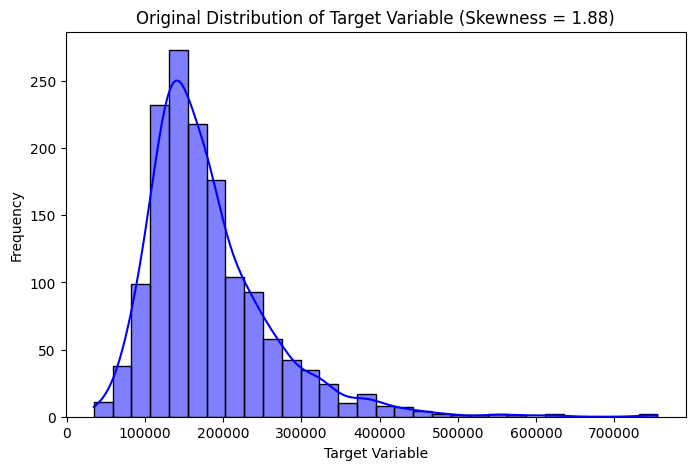

In [28]:
# Step 9: Check Skewness
target_skewness = y.skew()
print(f"Skewness of target variable (y): {target_skewness:.2f}")

# Visualize the target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title(f"Original Distribution of Target Variable (Skewness = {target_skewness:.2f})")
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

Target variable is highly skewed. Applying log transformation...


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


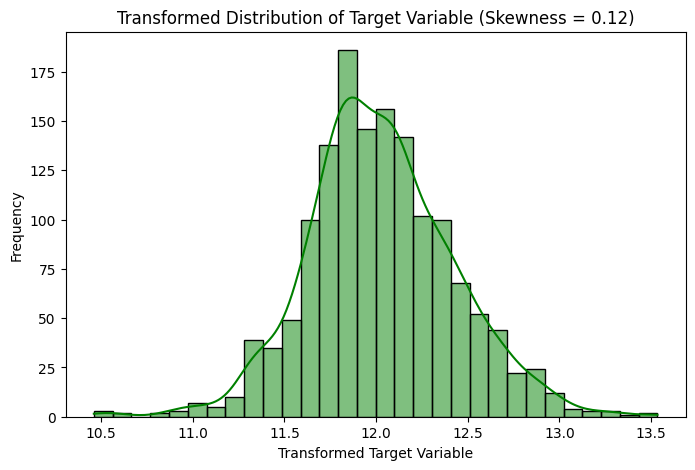

In [29]:
# Step 10: Apply Transformations
if abs(target_skewness) > 1:  # Threshold for high skewness
    print("Target variable is highly skewed. Applying log transformation...")
    y_transformed = np.log1p(y)  # Log transformation
    transformed_skewness = y_transformed.skew()
    
    # Visualize the transformed target variable
    plt.figure(figsize=(8, 5))
    sns.histplot(y_transformed, kde=True, bins=30, color='green')
    plt.title(f"Transformed Distribution of Target Variable (Skewness = {transformed_skewness:.2f})")
    plt.xlabel('Transformed Target Variable')
    plt.ylabel('Frequency')
    plt.show()
    
    # Replace y with transformed version if desired
    y = y_transformed
else:
    print("Target variable skewness is acceptable. No transformation applied.")

In [30]:
# Step11: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

In [31]:
# Final Check
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (1168, 15), X_test shape: (292, 15)
y_train shape: (1168,), y_test shape: (292,)


In [32]:
# Save train/test splits
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)
y_train_df = pd.Series(y_train, name='SalePrice')
y_test_df = pd.Series(y_test, name='SalePrice')

X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

print("Train/test splits saved: 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'")

Train/test splits saved: 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'


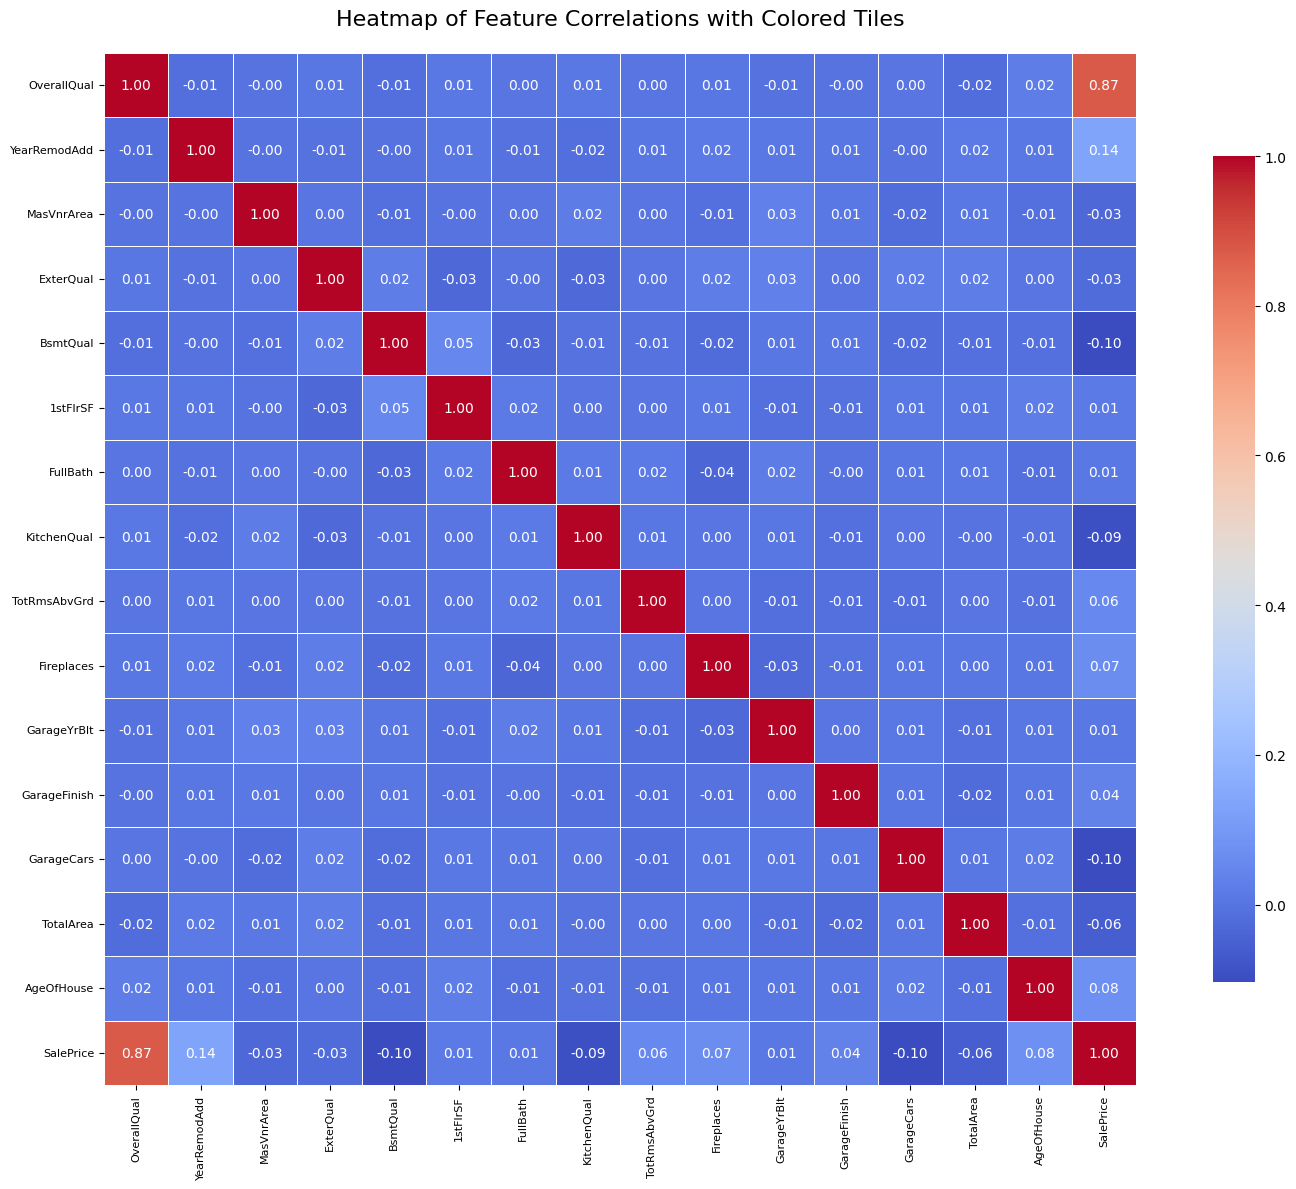

In [33]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# Plot heatmap as colorful tiles
plt.figure(figsize=(16, 12))  # Genişliği ve yüksekliği artır
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Eğer yalnızca renkli karolar istiyorsanız 'annot=True' yerine bunu kullanabilirsiniz
    cmap='coolwarm', 
    fmt=".2f", 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=90, fontsize=8)  # Daha küçük yazı boyutuyla X eksenini döndür
plt.yticks(fontsize=8)  # Daha okunabilir bir yazı boyutu
plt.title('Heatmap of Feature Correlations with Colored Tiles', fontsize=16, pad=20)
plt.tight_layout()  # Etiketlerin üst üste binmesini engeller
plt.show()

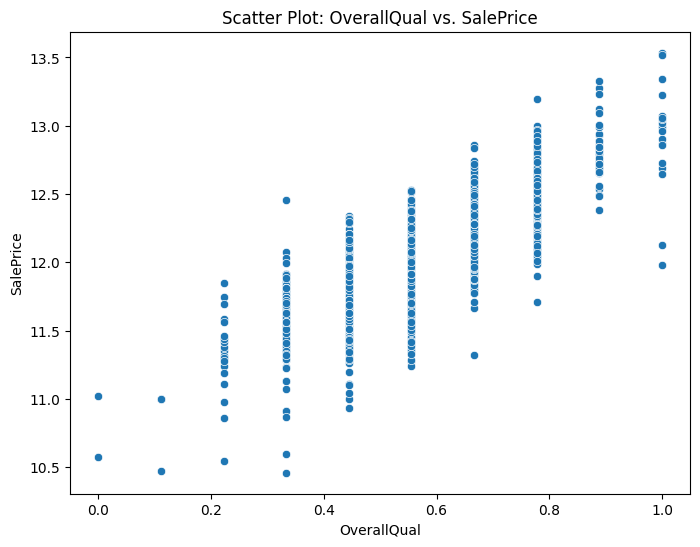

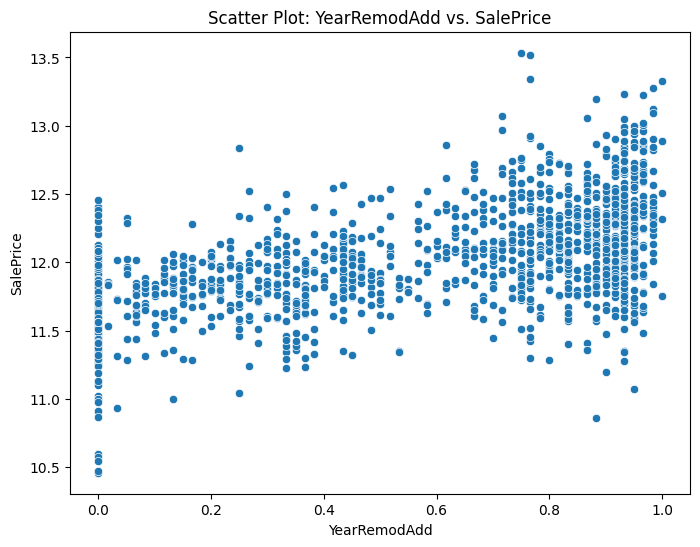

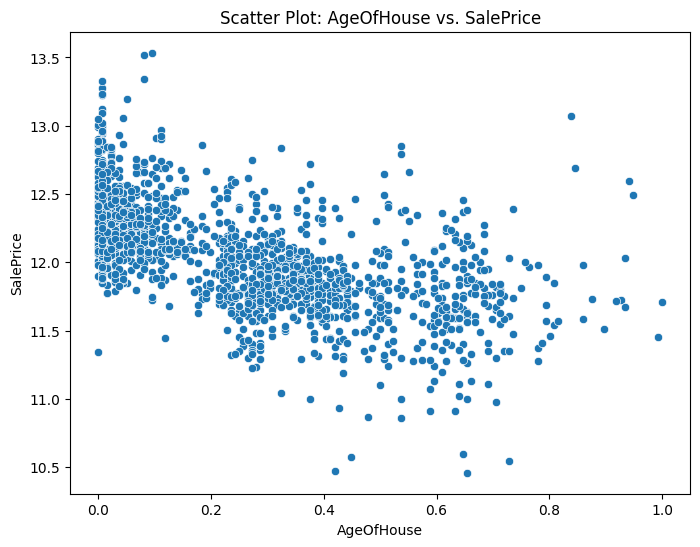

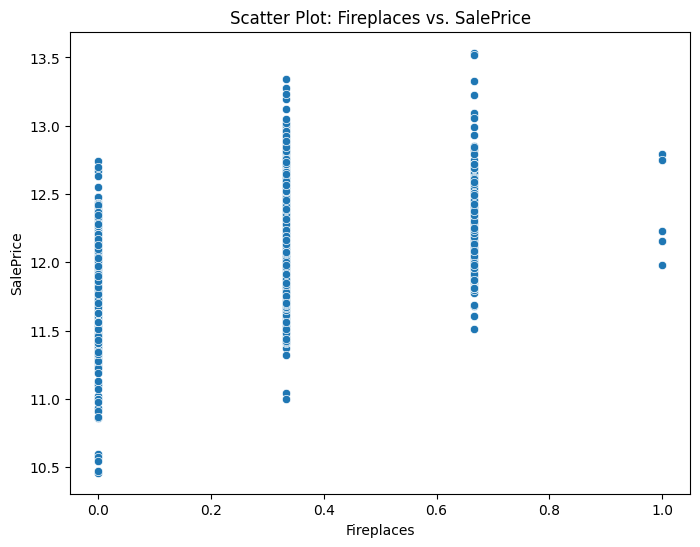

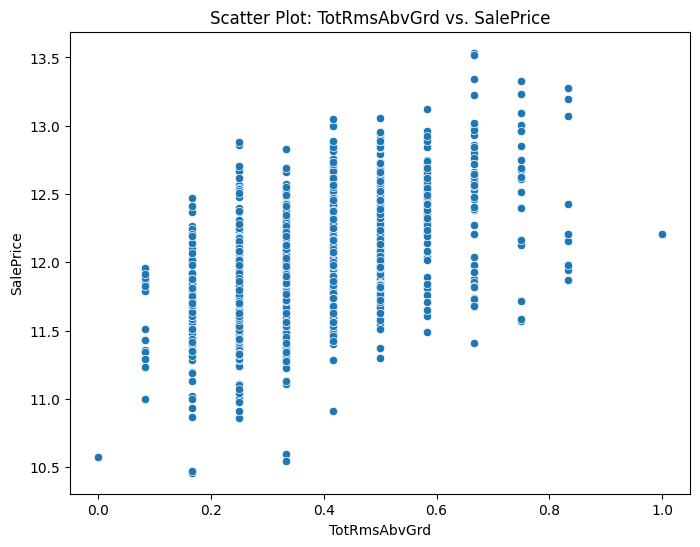

In [36]:
# Identify features most correlated with SalePrice
correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
top_features = correlations.index[1:6]  # Top 5 features (excluding SalePrice itself)

# Scatter plots for top correlated features
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'Scatter Plot: {feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()